In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sympy import symbols, Eq

Dados do relatório

In [2]:
# pressao em cm hm
# erro a menor medição foi 1
dados = {
    'Pi': [8, 12, 9, 15, 14],
    'Pf': [44, 40, 30, 29, 22],
    'N': [10, 8, 6, 4, 2]
}

df = pd.DataFrame(dados)
df

,Pi,Pf,N
0,8,44,10
1,12,40,8
2,9,30,6
3,15,29,4
4,14,22,2


Pi = pressão inicial em mmhg


Pf = pressão final


N = qtd de faixas

# Primeiro gŕafico

Pi - Pf

scatter plot somente para visualização

# item 1 e 2)

In [3]:
df['delta'] = (df['Pi'] - df['Pf']).abs()

Text(0, 0.5, 'Número de faixas')

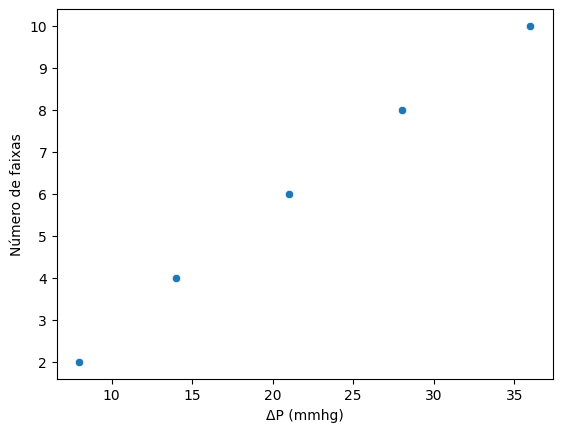

In [4]:
sns.scatterplot(data=df, x='delta', y='N')
plt.xlabel("ΔP (mmhg)")
plt.ylabel("Número de faixas")

Primeira regressão linear do problema, vamos identificar a relação entre DeltaP (diferença de pressão) e N (número de faixas)

In [5]:
ln = LinearRegression(fit_intercept=True)
ln.fit(df[['N']], df[['delta']])

LinearRegression()

Por que faz sentido utilizar "b" nessa regressão:

podemos considerar que quando x = 0, há uma pressão inicial de 0.4 no aparelho (o aparelho não é perfeito)

In [6]:
print(f"Nossa regressão linear: y = {round(ln.coef_[0][0], 2)} * x + {round(ln.intercept_[0], 2)}")

Nossa regressão linear: y = 3.5 * x + 0.4


In [7]:
print("R²: ", round(ln.score(df[['N']], df[['delta']]), 3))

R²:  0.998


Plotando regressão linear:

In [8]:
df['deltaP_previsto'] = ln.predict(df[['N']])

Text(0, 0.5, 'Número de faixas')

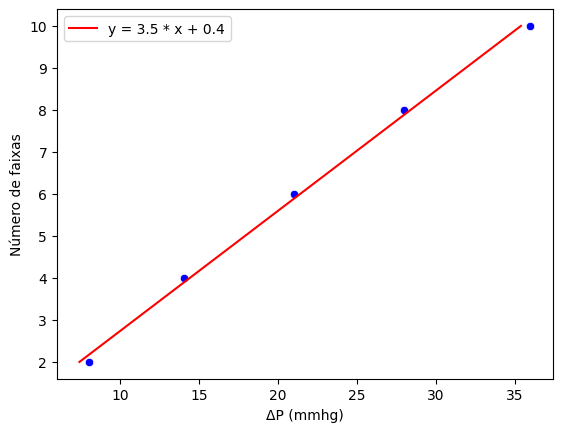

In [9]:
sns.scatterplot(data=df, x='delta', y='N', color='blue')
sns.lineplot(data=df, x='deltaP_previsto', y='N', color='red', label=f"y = {round(ln.coef_[0][0], 2)} * x + {round(ln.intercept_[0], 2)}")
plt.xlabel("ΔP (mmhg)")
plt.ylabel("Número de faixas")

In [10]:
df

,Pi,Pf,N,delta,deltaP_previsto
0,8,44,10,36,35.4
1,12,40,8,28,28.4
2,9,30,6,21,21.4
3,15,29,4,14,14.4
4,14,22,2,8,7.4


calculando índice de refração

(eq 4 do pdf)

# item 3)

In [11]:
N, d, nf, ni, lambda_0 = symbols('N d nf ni lambda_0')
eq = Eq(N, (2 * d * (nf - ni)) / lambda_0)
eq


Eq(N, 2*d*(nf - ni)/lambda_0)

In [12]:
ni = 1
lambda_0 = 632.8e-9
d = 3e-2

def nf_isolado(N, ni=1, lambda_0=632.8e-9, d=3e-2):
    return (N * lambda_0) / (2*d) + ni

In [14]:
df['indice_refracao'] = nf_isolado(df['N'])

<Axes: xlabel='indice_refracao', ylabel='Pf'>

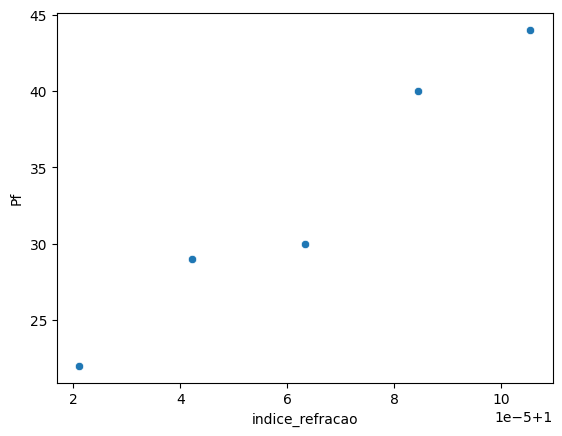

In [15]:
sns.scatterplot(data=df, x='indice_refracao', y='Pf')

# item 4)